In [2]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
# To Plot matplotlib figures inline on the notebook
%matplotlib inline

sns.set_style("whitegrid")

from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV


#This is for displaying the tree (we shouldn't need these now)
#!pip install pydotplus
#!pip install GraphViz
#import pydotplus as pydot
#from IPython.display import Image
from sklearn.externals.six import StringIO

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

/Users/dlicht/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [239]:
datafile = 'ModelData1.csv'

df = pd.read_csv(datafile)
df

Unnamed: 0  ID_num                            Name  applicationCategory  \
0              0      10                  Counter-Strike                    0   
1              1    1002                Rag Doll Kung Fu                    0   
2              2   10090      Call of Duty: World at War                    0   
3              3   10130                       TimeShift                    0   
4              4   10180  Call of Duty: Modern Warfare 2                    0   
5              5   10220                        Postal 3                    0   
6              6  102400                Vertex Dispenser                    0   
7              7   10250    PT Boats: Knights of the Sea                    0   
8              8  102500  Kingdoms of Amalur: Reckoning™                    0   
9              9   10260          PT Boats: South Gambit                    0   
10            10  102600                  Orcs Must Die!                    0   
11            11   10270    Disciples III: Reincarnation                    0   
...          ...     ...                             ...                  ...   
6986        6986    9850    Codename: Panzers - Cold War                    0   
6987        6987   98500                   Naval Warfare                    0   
6988        6988    9880                Champions Online                    0   
6989        6989   98800             Dungeons of Dredmor                    0   
6990        6990    9900                Star Trek Online                    0   
6991        6991   99100  Dungeons & Dragons: Daggerdale                    0   
6992        6992   99120                   Yar's Revenge                    0   
6993        6993    9930          Test Drive Unlimited 2                    0   
6994        6994   99300                    Renegade Ops                    0   
6995        6995    9940                    Blade Kitten                    0   
6996        6996   99900                  Spiral Knights                    0   
6997        6997   99910                  Puzzle Pirates                    0   

      OS_windows  OS_mac  OS_linux  SteamPlay Release_Date  worstRating  \
0              1       1         1          1   2000-11-01          0.0   
1             -1      -1        -1          0   2005-10-12          NaN   
2             -1      -1        -1          0   2008-11-18          0.0   
3             -1      -1        -1          0   2007-10-30          0.0   
4             -1      -1        -1          0   2009-11-12          0.0   
5             -1      -1        -1          0   2011-12-21          NaN   
6              1       1         0          1   2011-06-10          NaN   
7             -1      -1        -1          0   2009-01-30          NaN   
8             -1      -1        -1          0   2012-02-07          0.0   
9             -1      -1        -1          0   2010-12-10          NaN   
10            -1      -1        -1          0   2011-10-11          0.0   
11             1       0         0          0   2014-02-14          NaN   
...          ...     ...       ...        ...          ...          ...   
6986           1       0         0          0   2009-03-10          NaN   
6987          -1      -1        -1          0   2011-05-25          NaN   
6988           1       0         0          0   2009-09-01          NaN   
6989           1       1         1          1   2011-07-13          0.0   
6990           1       0         0          0   2010-02-02          0.0   
6991          -1      -1        -1          0   2011-06-24          NaN   
6992          -1      -1        -1          0   2011-04-28          NaN   
6993          -1      -1        -1          0   2011-02-01          NaN   
6994          -1      -1        -1          0   2011-10-26          0.0   
6995           1       0         0          0   2010-09-22          0.0   
6996           1       1         0          1   2011-06-14          0.0   
6997           1       1

In [240]:
#convert Release_Date column to a datetime object
from dateutil.parser import *

def toDT(d):
    #print(d)
    if d == np.nan or d == 'nan': return np.nan
    try:
        date = parse(d)
        return date.timestamp()
    except (ValueError,TypeError):
        print("unparsable data:",d)
        return np.nan

df['Release_Date'] = df['Release_Date'].map(toDT)
df.head()
#note, can't re-run this without the code above, as it changes data in place

unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable da

Unnamed: 0  ID_num                            Name  applicationCategory  \
0           0      10                  Counter-Strike                    0   
1           1    1002                Rag Doll Kung Fu                    0   
2           2   10090      Call of Duty: World at War                    0   
3           3   10130                       TimeShift                    0   
4           4   10180  Call of Duty: Modern Warfare 2                    0   

   OS_windows  OS_mac  OS_linux  SteamPlay  Release_Date  worstRating  \
0           1       1         1          1     9.731e+08          0.0   
1          -1      -1        -1          0     1.129e+09          NaN   
2          -1      -1        -1          0     1.227e+09          0.0   
3          -1      -1        -1          0     1.194e+09          0.0   
4          -1      -1        -1          0     1.258e+09          0.0   

   bestRating  ratingValue  reviewCount  Price  Lowest_Price  Max_Sale  \
0       100.0        97.74      93913.0   9.99          2.49      75.0   
1         NaN          NaN          NaN   9.99          2.49      75.0   
2       100.0        92.69      16971.0  19.99          9.79      51.0   
3       100.0        76.69        653.0  19.99          4.99      75.0   
4       100.0        90.93      26992.0  19.99          9.79      51.0   

   controller_support  metacritic_score  community_visible_stats  \
0                   0              88.0                        0   
1                   0              69.0                       -1   
2                   0              83.0                        0   
3                   0              71.0                        0   
4                   0              86.0                        0   

   workshop_visible  releasestate  languages_num  community_hub_visible  \
0                -1            -1              0                      0   
1                -1            -1              0                      0   
2                -1            -1              0                      0   
3                -1            -1              0                      0   
4                -1            -1              8                      0   

      owners  owners_unc  players_total  owners_played_percent  \
0  1.344e+07     96036.0      9.427e+06                  70.13   
1  3.935e+04      5282.0      1.188e+04                  30.19   
2  1.674e+06     34382.0      1.424e+06                  85.07   
3  1.340e+05      9746.0      5.549e+04                  41.41   
4  5.246e+06     60607.0      4.687e+06                  89.33   

   players_2_weeks  players_2_weeks_percent  median_total_playtime  \
0         361920.0                     2.69                    6.9   
1              0.0                     0.00                    NaN   
2         106163.0                     6.34                   12.5   
3           1172.0                     0.87                    1.1   
4          70157.0                     1.34                    9.4   

   average_total_playtime  Packages  DLCs  Depots  genre_Action  genre_Indie  \
0                   185.9        65     0    24.0             1            0   
1                     1.1         4     1     2.0             0            1   
2                    42.1        41     0     7.0             1            0   
3                     3.1         6     0     1.0             1            0   
4                    23.5        37     0    18.0             1            0   

   genre_Strategy  genre_Simulation  genre_RPG  genre_Adventure  genre_Casual  \
0               0                 0          0                0             0   
1               0                 0          0                0             0   
2               0                 0          0                0             0   
3               0                 0          0                0             0   
4               0                 0          0                0             0   

   g

## Create a log10 of owners

In [241]:
df["owners_log"]=df['owners'].map(lambda x: np.log10(x))

In [322]:
#filter filter out free and price errored games, and set all NaN to -1

df = df.fillna(value=-1)
df = df.loc[df['Price'] >= 0,:]
df = df.loc[df['owners'] >= 1,:]
df.tail(10)

Unnamed: 0  ID_num                            Name  applicationCategory  \
6988        6988    9880                Champions Online                    0   
6989        6989   98800             Dungeons of Dredmor                    0   
6990        6990    9900                Star Trek Online                    0   
6991        6991   99100  Dungeons & Dragons: Daggerdale                    0   
6992        6992   99120                   Yar's Revenge                    0   
6993        6993    9930          Test Drive Unlimited 2                    0   
6994        6994   99300                    Renegade Ops                    0   
6995        6995    9940                    Blade Kitten                    0   
6996        6996   99900                  Spiral Knights                    0   
6997        6997   99910                  Puzzle Pirates                    0   

      OS_windows  OS_mac  OS_linux  SteamPlay  Release_Date  worstRating  \
6988           1       0         0          0     1.252e+09         -1.0   
6989           1       1         1          1     1.311e+09          0.0   
6990           1       0         0          0     1.265e+09          0.0   
6991          -1      -1        -1          0     1.309e+09         -1.0   
6992          -1      -1        -1          0     1.304e+09         -1.0   
6993          -1      -1        -1          0     1.297e+09         -1.0   
6994          -1      -1        -1          0     1.320e+09          0.0   
6995           1       0         0          0     1.285e+09          0.0   
6996           1       1         0          1     1.308e+09          0.0   
6997           1       1         0          1     1.315e+09          0.0   

      bestRating  ratingValue  reviewCount  Price  Lowest_Price  Max_Sale  \
6988        -1.0        -1.00         -1.0   0.00         -1.00      -1.0   
6989       100.0        93.92       3762.0   4.99          1.24      75.0   
6990       100.0        75.82       8329.0   0.00         -1.00      -1.0   
6991        -1.0        -1.00         -1.0  14.99          3.74      75.0   
6992        -1.0        -1.00         -1.0   9.99          1.99      80.0   
6993        -1.0        -1.00         -1.0  19.99          4.99      75.0   
6994       100.0        84.86       1649.0  15.00          3.00      80.0   
6995       100.0        80.25        785.0   2.99          0.74      75.0   
6996       100.0        83.02      17056.0   0.00         -1.00      -1.0   
6997       100.0        77.69       1088.0   0.00         -1.00      -1.0   

      controller_support  metacritic_score  community_visible_stats  \
6988                   0              -1.0                       -1   
6989                   0              79.0                        0   
6990                   0              -1.0                       -1   
6991                   3              -1.0                        0   
6992                   3              56.0                        0   
6993                   0              72.0                        0   
6994                   1              76.0                        0   
6995                   3              52.0                        0   
6996                   0              -1.0                       -1   
6997                   0              -1.0                       -1   

      workshop_visible  releasestate  languages_num  community_hub_visible  \
6988                -1            -1              0                     -1   
6989                 0            -1              0                      0   
6990                -1            -1              0                     -1   
6991                -1            -1              5                      0   
6992                -1            -1              3                      0   
6993                -1            -1              5                      0   
6994                -1            -1              7                      0   
6995                -1 

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5144 entries, 0 to 6997
Data columns (total 47 columns):
Unnamed: 0                     5144 non-null int64
ID_num                         5144 non-null int64
Name                           5144 non-null object
applicationCategory            5144 non-null int64
OS_windows                     5144 non-null int64
OS_mac                         5144 non-null int64
OS_linux                       5144 non-null int64
SteamPlay                      5144 non-null int64
Release_Date                   5144 non-null float64
worstRating                    5144 non-null float64
bestRating                     5144 non-null float64
ratingValue                    5144 non-null float64
reviewCount                    5144 non-null float64
Price                          5144 non-null float64
Lowest_Price                   5144 non-null float64
Max_Sale                       5144 non-null float64
controller_support             5144 non-null int64
metacriti

# Separating features and target variables

In [243]:
df.columns

Index(['Unnamed: 0', 'ID_num', 'Name', 'applicationCategory', 'OS_windows',
       'OS_mac', 'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating',
       'bestRating', 'ratingValue', 'reviewCount', 'Price', 'Lowest_Price',
       'Max_Sale', 'controller_support', 'metacritic_score',
       'community_visible_stats', 'workshop_visible', 'releasestate',
       'languages_num', 'community_hub_visible', 'owners', 'owners_unc',
       'players_total', 'owners_played_percent', 'players_2_weeks',
       'players_2_weeks_percent', 'median_total_playtime',
       'average_total_playtime', 'Packages', 'DLCs', 'Depots', 'genre_Action',
       'genre_Indie', 'genre_Strategy', 'genre_Simulation', 'genre_RPG',
       'genre_Adventure', 'genre_Casual', 'genre_Early Access', 'genre_Racing',
       'genre_Sports', 'genre_Free to Play', 'genre_Massively Multiplayer',
       'owners_log'],
      dtype='object')

In [244]:
feature_columns = ['OS_windows', 'OS_mac',
       'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating', 'bestRating',
       'ratingValue', 'Price', 'Lowest_Price', 'Max_Sale',
       'controller_support', 'metacritic_score', 'community_visible_stats',
       'workshop_visible', 'releasestate', 'languages_num',
       'community_hub_visible', 
       'owners_played_percent', 'players_2_weeks_percent',
       'median_total_playtime', 'average_total_playtime', 'Packages', 'DLCs',
       'Depots', 'genre_Action', 'genre_RPG', 'genre_Indie', 'genre_Strategy',
       'genre_Adventure', 'genre_Simulation', 'genre_Casual',
       'genre_Early Access', 'genre_Racing', 'genre_Free to Play',
       'genre_Sports', 'genre_Massively Multiplayer']

"""removed columns, due to 'cheating' correlation with owners
'reviewCount', 'owners', 'owners_unc', 'players_total', 'players_2_weeks',
"owners_log"
"""
target = "owners_log"

y = df.loc[:,target]
X = df.loc[:,feature_columns]

In [245]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [246]:
len(feature_columns)

37

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5144 entries, 0 to 6997
Data columns (total 47 columns):
Unnamed: 0                     5144 non-null int64
ID_num                         5144 non-null int64
Name                           5144 non-null object
applicationCategory            5144 non-null int64
OS_windows                     5144 non-null int64
OS_mac                         5144 non-null int64
OS_linux                       5144 non-null int64
SteamPlay                      5144 non-null int64
Release_Date                   5144 non-null float64
worstRating                    5144 non-null float64
bestRating                     5144 non-null float64
ratingValue                    5144 non-null float64
reviewCount                    5144 non-null float64
Price                          5144 non-null float64
Lowest_Price                   5144 non-null float64
Max_Sale                       5144 non-null float64
controller_support             5144 non-null int64
metacriti

In [103]:
sns.set_style("whitegrid")

## Initial Looks

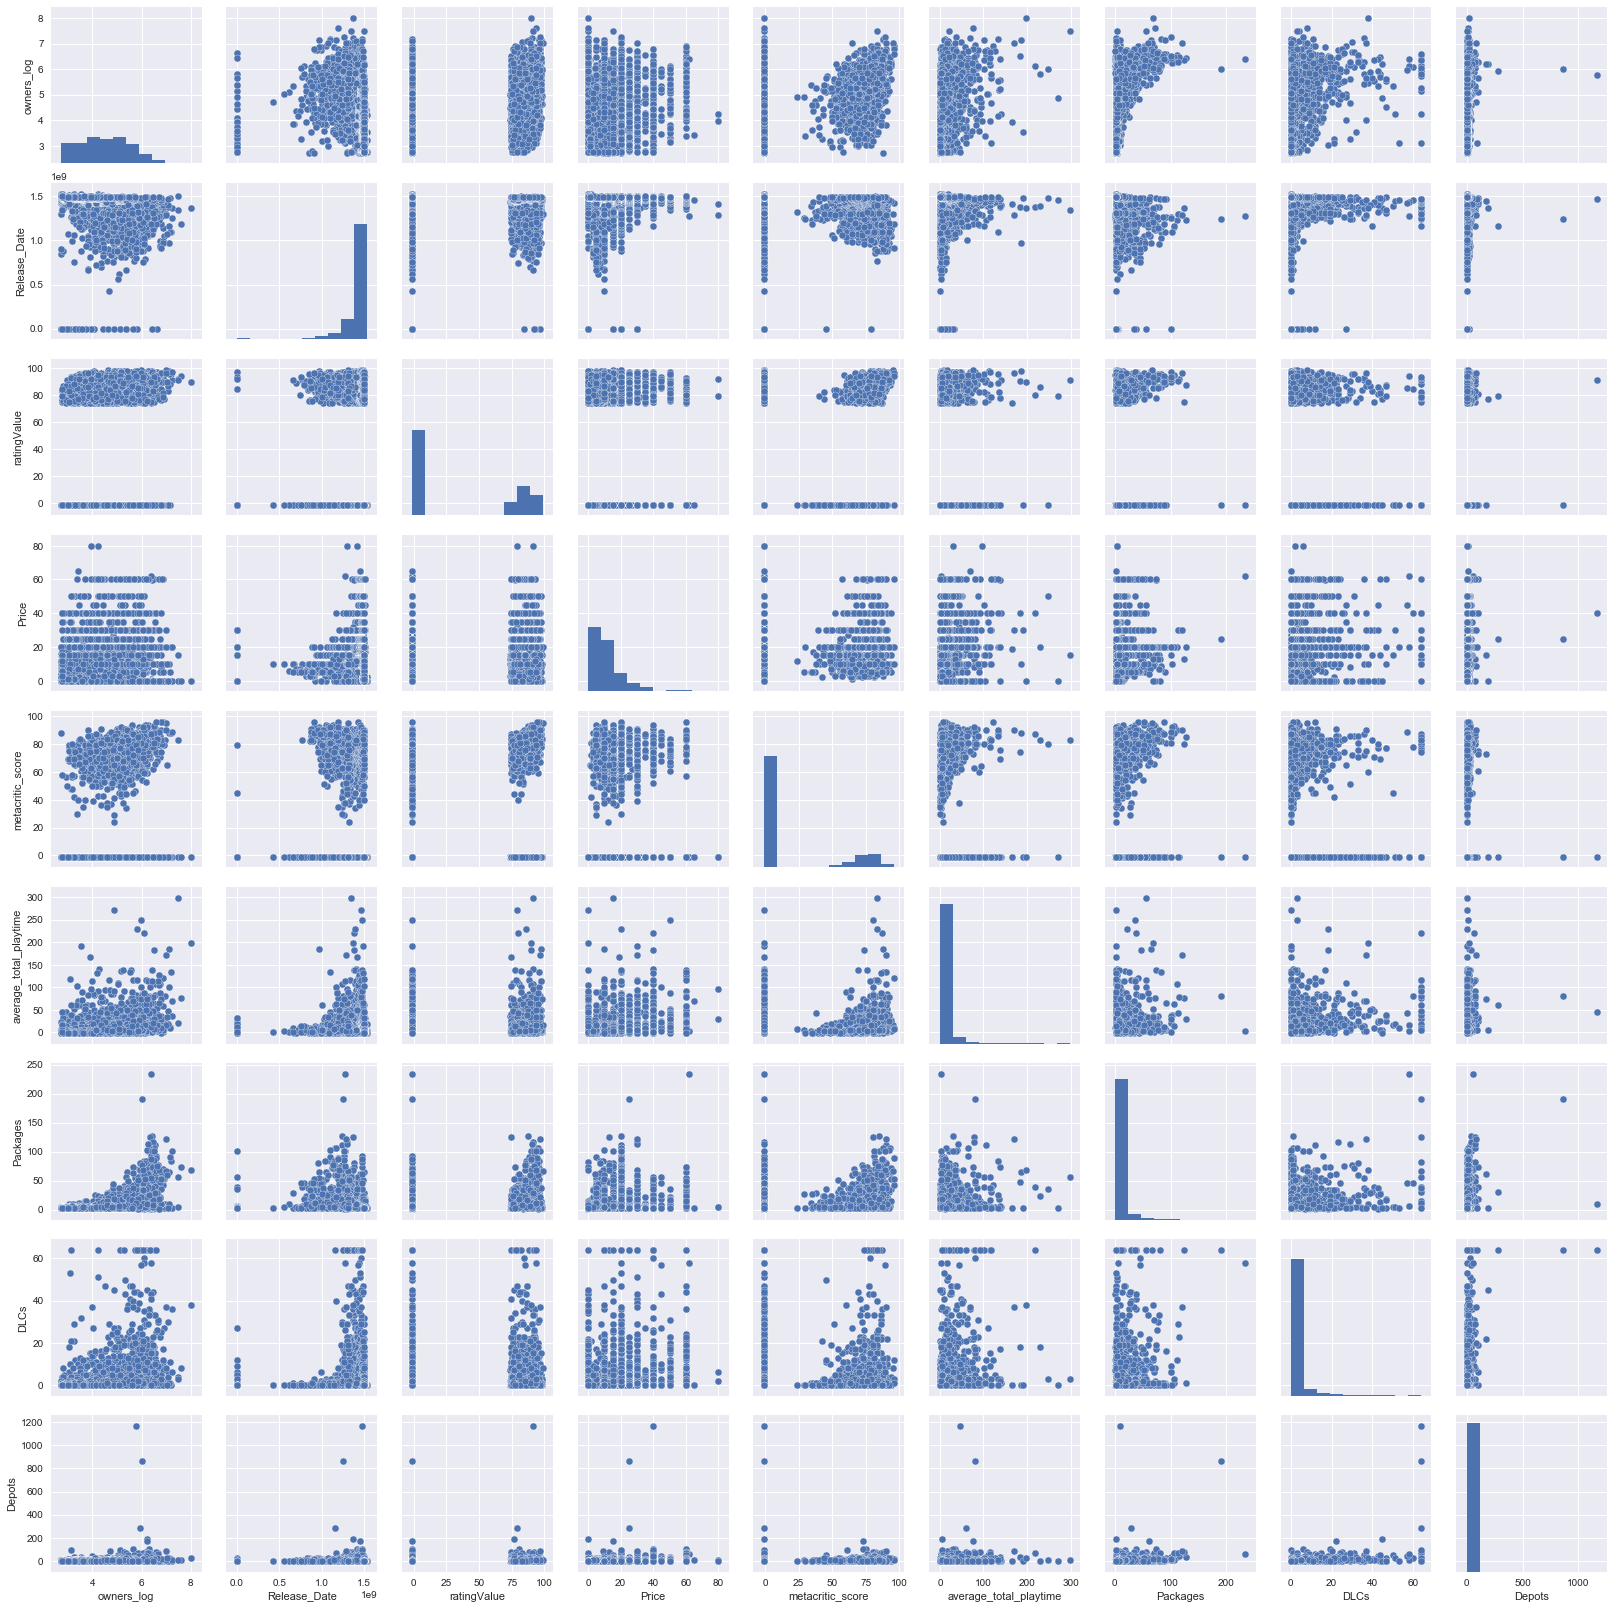

In [11]:
df_subset = df.loc[:,["owners_log",'Release_Date', 'ratingValue',
       'Price', 
       'metacritic_score',
       'average_total_playtime', 'Packages', 'DLCs', 'Depots']]
sns.pairplot(df_subset)

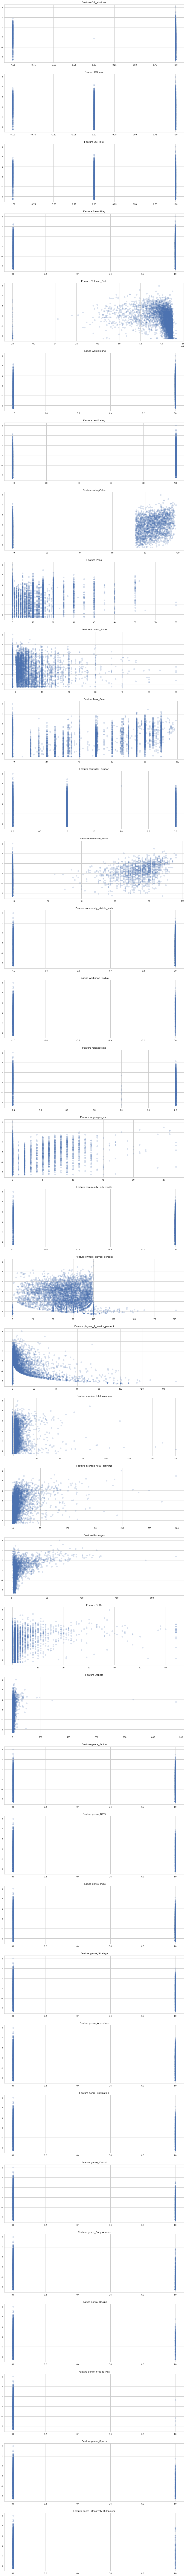

In [104]:
fig,ax = plt.subplots(ncols=1,nrows=len(X.columns),figsize=(15, 220))

for i,feature in enumerate(X):
    ax[i].scatter(X[feature],y,alpha=.2)
    ax[i].set_title("Feature "+str(feature))

In [105]:
"""('OS_windows', 0.0),
 ('OS_mac', 0.0),
 ('OS_linux', 0.0),
 ('SteamPlay', 0.0),
 ('Release_Date', -0.0003126391802476204),
 ('worstRating', -0.0),
 ('bestRating', -1567.3410435531523),
 ('ratingValue', 3593.9072708554922),
 ('Price', -0.0),
 ('Lowest_Price', -2081.2772418718241),
 ('Max_Sale', 1499.3564564871849),
 ('controller_support', 0.0),
 ('metacritic_score', 2105.4334582222991),
 ('community_visible_stats', 0.0),
 ('workshop_visible', 0.0),
 ('releasestate', -0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', 0.0),
 ('owners_played_percent', 0.0),
 ('players_2_weeks_percent', -1.7373146986772761),
 ('median_total_playtime', -0.0),
 ('average_total_playtime', 6063.7059692453195),
 ('Packages', 22882.046944052454),
 ('DLCs', -0.0),
 ('Depots', -885.06284036310183),"""

"('OS_windows', 0.0),\n ('OS_mac', 0.0),\n ('OS_linux', 0.0),\n ('SteamPlay', 0.0),\n ('Release_Date', -0.0003126391802476204),\n ('worstRating', -0.0),\n ('bestRating', -1567.3410435531523),\n ('ratingValue', 3593.9072708554922),\n ('Price', -0.0),\n ('Lowest_Price', -2081.2772418718241),\n ('Max_Sale', 1499.3564564871849),\n ('controller_support', 0.0),\n ('metacritic_score', 2105.4334582222991),\n ('community_visible_stats', 0.0),\n ('workshop_visible', 0.0),\n ('releasestate', -0.0),\n ('languages_num', 0.0),\n ('community_hub_visible', 0.0),\n ('owners_played_percent', 0.0),\n ('players_2_weeks_percent', -1.7373146986772761),\n ('median_total_playtime', -0.0),\n ('average_total_playtime', 6063.7059692453195),\n ('Packages', 22882.046944052454),\n ('DLCs', -0.0),\n ('Depots', -885.06284036310183),"

## A closer look at a few of the more interesting features

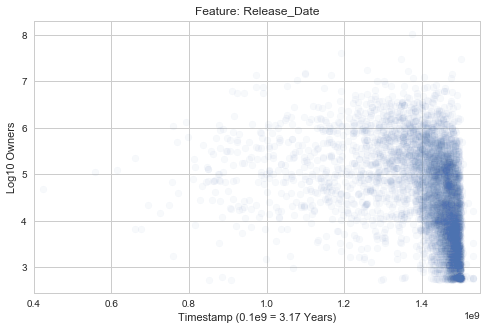

In [127]:
feature = 'Release_Date'
plt.figure(figsize=(8, 5))
plt.title("Feature: "+str(feature))
plt.xlim(0.4e9,1.55e9)
plt.ylabel("Log10 Owners")
plt.xlabel("Timestamp (0.1e9 = 3.17 Years)")
plt.scatter(X[feature],y,alpha=.04);

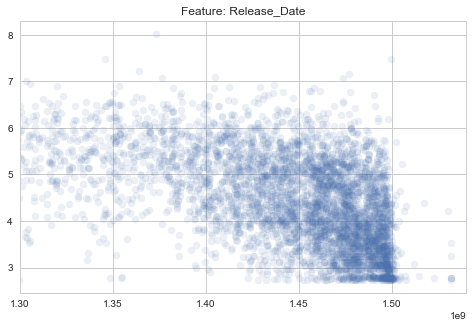

In [107]:
feature = 'Release_Date'
plt.figure(figsize=(8, 5))
plt.title("Feature: "+str(feature))
plt.xlim(1.3e9,1.54e9)
plt.scatter(X[feature],y,alpha=.1);

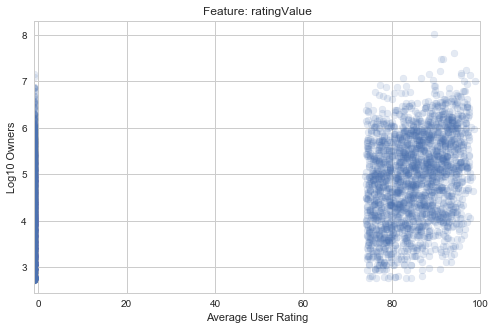

In [124]:
feature = 'ratingValue'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)
#ax.set_yscale('log')
ax.set_xlim(-1,100)

ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.15);
ax.set_ylabel("Log10 Owners")
ax.set_xlabel("Average User Rating")
feature = 'metacritic_score'


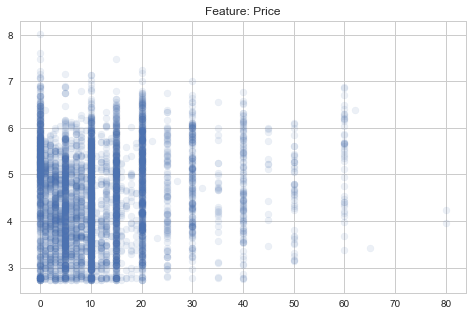

In [109]:
feature = 'Price'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)
#ax.set_yscale('log')
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

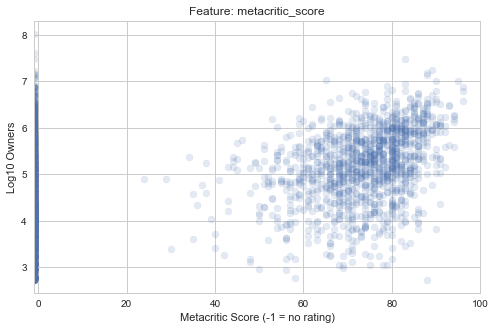

In [122]:
feature = 'metacritic_score'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)
#ax.set_yscale('log')
ax.set_xlim(-1,100)
ax.set_ylabel("Log10 Owners")
ax.set_xlabel("Metacritic Score (-1 = no rating)")
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.15);

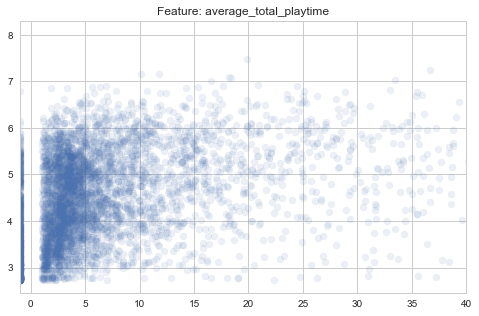

In [111]:
feature = 'average_total_playtime'
fig, ax =  plt.subplots(figsize=(8, 5))

#ax.set_ylim(100,5e7)
#ax.set_yscale('log')

ax.set_xlim(-1,40)

ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

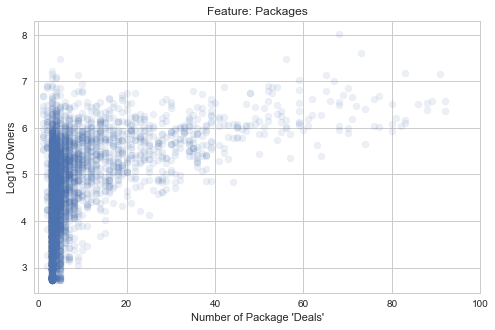

In [129]:
feature = 'Packages'
fig, ax =  plt.subplots(figsize=(8, 5))

ax.set_xlim(-1,100)
ax.set_title("Feature: "+str(feature))
ax.set_ylabel("Log10 Owners")
ax.set_xlabel("Number of Package 'Deals'")

ax.scatter(X[feature],y,alpha=.1);

## and for the features I determined were 'cheating' due to being caused by the target
#### 'reviewCount', 'owners', 'owners_unc', 'players_total', 'players_2_weeks',

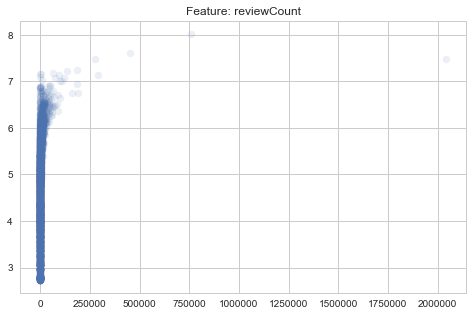

In [113]:
feature = 'reviewCount'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
#ax.set_xscale('log')
ax.scatter(df[feature],y,alpha=.1);

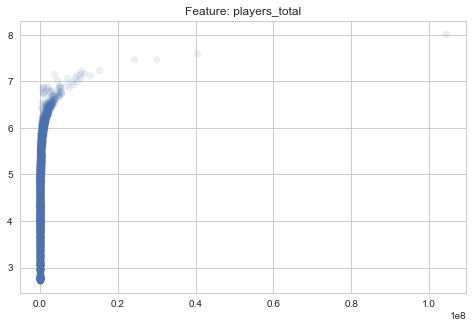

In [114]:
feature = 'players_total'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

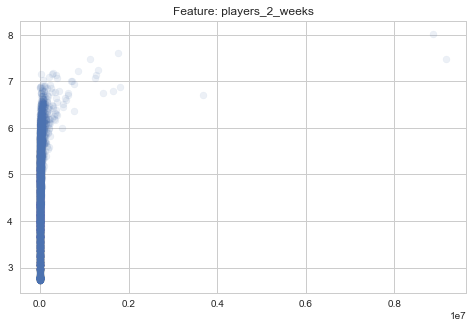

In [115]:
feature = 'players_2_weeks'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

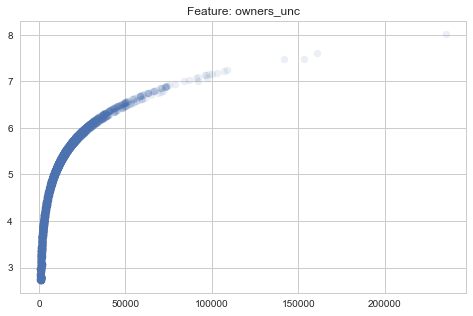

In [116]:
feature = 'owners_unc'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

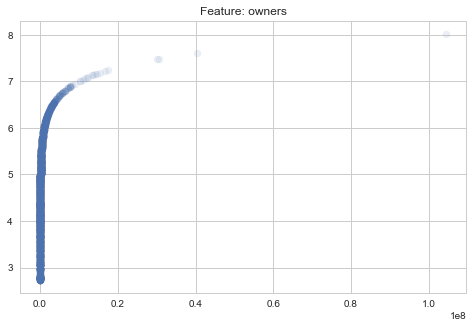

In [117]:
#just a verification
feature = 'owners'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

In [26]:
df.describe()

Unnamed: 0      ID_num  applicationCategory  OS_windows    OS_mac  \
count    5144.000    5144.000               5144.0    5144.000  5144.000   
mean     3009.630  363064.159                  0.0       0.802     0.283   
std      1859.668  164917.565                  0.0       0.597     0.633   
min         0.000      10.000                  0.0      -1.000    -1.000   
25%      1408.750  267590.000                  0.0       1.000     0.000   
50%      2903.500  375185.000                  0.0       1.000     0.000   
75%      4472.250  488357.500                  0.0       1.000     1.000   
max      6997.000  668140.000                  0.0       1.000     1.000   

       OS_linux  SteamPlay  Release_Date  worstRating  bestRating  \
count  5144.000   5144.000     5.144e+03     5144.000    5144.000   
mean      0.176      0.404     1.394e+09       -0.576      41.843   
std       0.586      0.491     1.854e+08        0.494      49.921   
min      -1.000      0.000    -1.000e+00       -1.000      -1.000   
25%       0.000      0.000     1.393e+09       -1.000      -1.000   
50%       0.000      0.000     1.450e+09       -1.000      -1.000   
75%       1.000      1.000     1.479e+09        0.000     100.000   
max       1.000      1.000     1.532e+09        0.000     100.000   

       ratingValue  reviewCount     Price  Lowest_Price  Max_Sale  \
count     5144.000    5.144e+03  5144.000      5144.000  5144.000   
mean        35.503    2.563e+03    11.642         5.000    50.138   
std         42.739    3.264e+04    10.858         6.691    30.453   
min         -1.000   -1.000e+00     0.000        -1.000    -1.000   
25%         -1.000   -1.000e+00     3.990         0.990    25.000   
50%         -1.000   -1.000e+00     9.990         2.990    51.000   
75%         83.093    5.032e+02    14.990         6.990    75.000   
max         98.720    2.041e+06    79.990        59.990    99.000   

       controller_support  metacritic_score  community_visible_stats  \
count            5144.000          5144.000                 5144.000   
mean                0.779            17.950                   -0.340   
std                 1.099            32.892                    0.474   
min                 0.000            -1.000                   -1.000   
25%                 0.000            -1.000                   -1.000   
50%                 0.000            -1.000                    0.000   
75%                 1.000            45.000                    0.000   
max                 3.000            96.000                    0.000   

       workshop_visible  releasestate  languages_num  community_hub_visible  \
count          5144.000      5144.000       5144.000               5144.000   
mean             -0.926         1.218          1.618                 -0.116   
std               0.261         1.316          3.471                  0.320   
min              -1.000        -1.000          0.000                 -1.000   
25%              -1.000        -1.000          0.000                  0.000   
50%              -1.000         2.000          0.000                  0.000   
75%              -1.000         2.000          1.000                  0.000   
max               0.000         2.000         27.000                  0.000   

          owners  owners_unc  players_total  owners_played_percent  \
count  5.144e+03    5144.000      5.144e+03               5144.000   
mean   3.395e+05    9427.578      2.364e+05                 65.985   
std    1.938e+06   12629.955      1.791e+06                 25.714   
min    5.430e+02     628.000      0.000e+00                  0.000   
25%    5.087e+03    2028.000      2.970e+03                 50.765   
50%    3.086e+04    4870.500      1.866e+04                 69.085   
75%    1.810e+05   11832.000      1.071e+05                 85.835   
max    1.045e+08  235425.000      1.044e+08                201.660   

       players_2_weeks  players_2_weeks_percent  median_total_playtime  \
count       

# Trying a simple tree model

In [258]:
## To start, we will build a single tree
from sklearn import tree

# Set some (starting) parameters
#dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4)
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=6, min_samples_leaf=8)

# Fit the model to some training data
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [259]:
# Export the structure of the tree to a file

tree.export_graphviz(dtrmodel, out_file='tree.dot',feature_names = X_train.columns)

In [260]:
# Look at the file (using ! for a command line access)

!head tree.dot

digraph Tree {
node [shape=box] ;
0 [label="players_2_weeks_percent <= 0.035\nmse = 0.9853\nsamples = 3600\nvalue = 4.5121"] ;
1 [label="Release_Date <= 1455652864.0\nmse = 0.4473\nsamples = 858\nvalue = 3.6156"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="owners_played_percent <= 86.025\nmse = 0.4763\nsamples = 383\nvalue = 3.9899"] ;
1 -> 2 ;
3 [label="owners_played_percent <= 3.04\nmse = 0.4176\nsamples = 328\nvalue = 4.1137"] ;
2 -> 3 ;
4 [label="releasestate <= 0.0\nmse = 0.054\nsamples = 18\nvalue = 2.9217"] ;


# Now:
# 1) Open a new browser tab and go to http://webgraphviz.com 
# 2) Open the tree.dot file as a text file
# 3) Copy and Paste the text of the file into the webpage

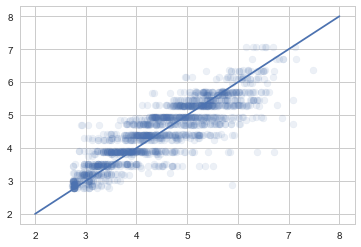

In [261]:
tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
plt.plot(np.linspace(2,8,1000),np.linspace(2,8,1000));


In [262]:
# Root Mean Square Error
np.sqrt(np.mean((tree_pred_test - y_test)**2))

0.51566614855157922

In [263]:
print(r2_score(y_test, tree_pred_test))
r2_score(10**y_test, 10**tree_pred_test)

0.741240875557


0.092964156480794591

# Need a better test metric due to logithmic nature of my target:

In [264]:
def MultiAbsError(test,prediction):
    MAD_log = np.mean(np.abs(prediction-test))
    return 10**MAD_log

In [324]:
MultiAbsError(y_test,tree_pred_test)

11.337558871020072

In [ ]:
def MeanAbsMultiError(test,prediction):
    MALE = np.mean(np.abs(prediction-test))
    #recall that target data has been through Log10, apply 10^x to reverse
    return 10**MALE

# Random Forrest

In [266]:
from sklearn.ensemble import RandomForestRegressor

In [267]:
# Initialize the model, then fit it on the training data

#this test run uses the parameters from the RealEstate date as a starting point
rfmodel1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf=5, max_features=4, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [268]:
# Use the trained model to predict the results on the test set

rf1_test_pred = rfmodel1.predict(X_test)

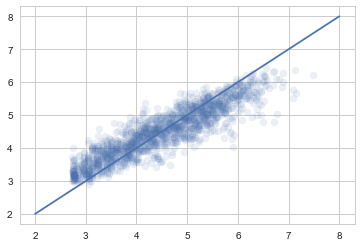

In [269]:
#Plot actual vs predicted
plt.scatter(y_test, rf1_test_pred,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
plt.plot(np.linspace(2,8,1000),np.linspace(2,8,1000))



In [270]:
# Root Mean Square Error 
np.sqrt(np.mean((rf1_test_pred - y_test)**2))

0.45880002565029837

In [271]:
#R squared score
r2_score(y_test, rf1_test_pred)
r2_score(10**y_test, 10**rf1_test_pred)

0.17317859809815717

In [272]:
#New Multiplicative Metric
MultiAbsError(y_test,rf1_test_pred)

2.301838224835325

In [273]:
#look at the importance of each parameter:
coefs = rfmodel1.fit(X,y).feature_importances_   #note, run on whole dataset, not just X_train,y_train
sorted(zip(X.columns,coefs), key = lambda x:x[1], reverse=True)

[('players_2_weeks_percent', 0.17121333866070335),
 ('Packages', 0.12111775328500698),
 ('Release_Date', 0.10311912647831707),
 ('owners_played_percent', 0.073203445919040211),
 ('average_total_playtime', 0.06267193874432557),
 ('releasestate', 0.055622457987442087),
 ('metacritic_score', 0.047619920888235391),
 ('ratingValue', 0.043108139156126164),
 ('Depots', 0.039034612807080989),
 ('Max_Sale', 0.038651170091317619),
 ('bestRating', 0.035146977886963415),
 ('Lowest_Price', 0.034872858261931233),
 ('DLCs', 0.03042506242535024),
 ('Price', 0.023870345988774754),
 ('median_total_playtime', 0.022816457785145849),
 ('worstRating', 0.017504356100450032),
 ('genre_Indie', 0.01344557556004301),
 ('languages_num', 0.011058938191965741),
 ('community_hub_visible', 0.010648748074054287),
 ('OS_mac', 0.0062484208961910859),
 ('genre_Early Access', 0.0054442311644559427),
 ('OS_linux', 0.0040906456294952497),
 ('community_visible_stats', 0.0035360160167131789),
 ('controller_support', 0.0033462

0.835756693575
0.251122400318
2.0698729572594083


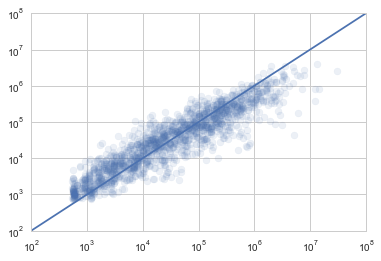

In [275]:
rfmodel1 = RandomForestRegressor(n_estimators = 200, min_samples_leaf=5,\
           max_features=9, n_jobs=-1, bootstrap=True)
rfmodel1.fit(X_train,y_train)
rf1_test_pred = rfmodel1.predict(X_test)

print(r2_score(y_test, rf1_test_pred))
print(r2_score(10**y_test, 10**rf1_test_pred))
#New Multiplicative Metric
print(MultiAbsError(y_test,rf1_test_pred))

plt.scatter(10**y_test, 10**rf1_test_pred,alpha=.1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,1e8)
plt.ylim(100,1e8)
plt.plot(np.linspace(0,1e8,1000),np.linspace(0,1e8,1000));

# Gradient Boosted Tree (best so far)

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

In [153]:
gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=0.11,\
                max_depth = 3,max_leaf_nodes=12,n_estimators=150,loss='huber',\
                min_samples_split=2)

In [154]:
gbmodel1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.11, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=12,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [155]:
gb1_test_pred = gbmodel1.predict(X_test)

0.846113351746
0.384237689252
1.9809321482913553


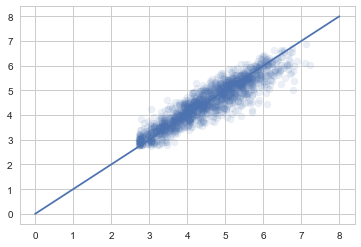

In [166]:
print(r2_score(y_test, gb1_test_pred))
print(r2_score(10**y_test, 10**gb1_test_pred))
#New Multiplicative Metric
print(MultiAbsError(y_test,gb1_test_pred))

plt.scatter(y_test, gb1_test_pred,alpha=.1)


plt.plot(np.linspace(0,8,1000),np.linspace(0,8,1000));

0.841242239391
0.841242239391
1.9977378778846884


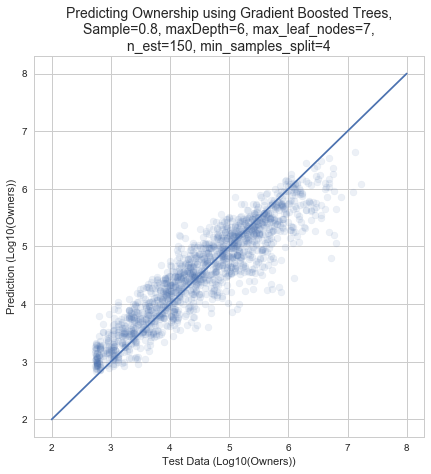

In [175]:
#try to tune this a little better (used the loops below)
gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=0.1,\
                max_depth = 6,max_leaf_nodes=7,n_estimators=150,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))
print(r2_score(y_test, gb1_test_pred))
#New Multiplicative Metric
print(MultiAbsError(y_test,gb1_test_pred))

plt.figure(figsize=(7,7))
plt.scatter(y_test, rf1_test_pred,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-100,1e7)
#plt.ylim(-100,1e7)
plt.xlabel("Test Data (Log10(Owners))")
plt.ylabel("Prediction (Log10(Owners))")
plt.title("Predicting Ownership using Gradient Boosted Trees,\nSample=0.8, maxDepth=6, max_leaf_nodes=7,\nn_est=150, min_samples_split=4",fontsize=14)
plt.plot(np.linspace(2,8,1000),np.linspace(2,8,1000));

[  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.
  18.]
3.0 1.9808541881142165
4.0 1.9806902043696626
5.0 1.9993773998172972
6.0 1.9884189721132923
7.0 1.9832196305095897
8.0 1.9918779225607295
9.0 1.9982006695480095
10.0 1.982678019819411
11.0 1.9789384980527962
12.0 1.9758809238149675
13.0 1.9813833379175556
14.0 1.9667363889716705
15.0 2.0008391132444405
16.0 1.9994405622577152
17.0 1.9749732687626285
18.0 1.9675280887948732


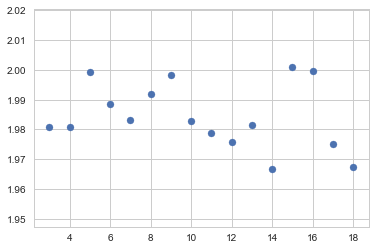

In [158]:
#searching for good tuning parameters
results = {}
space = np.linspace(3,18,16)
#space = [10,20,30,40,60,70,80,90,100,110,125,150,175,200,250,300,400]
print(space)
for i in space:
    gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=0.1,\
                max_depth = 6,max_leaf_nodes=7,n_estimators=150,loss='huber',\
                min_samples_split=4 )
    gbmodel1.fit(X_train,y_train)
    gb1_test_pred = gbmodel1.predict(X_test)
    Rsq = MultiAbsError(y_test,gb1_test_pred)
    print(i,Rsq)
    results[i]=Rsq
results
plt.scatter(list(results.keys()),list(results.values()))

In [ ]:
plt.scatter(y_test,y_test-gb1_test_pred,alpha=.25)
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(-1e6,1e6)
plt.plot(np.linspace(8,8,1000),np.linspace(0,0,1000))

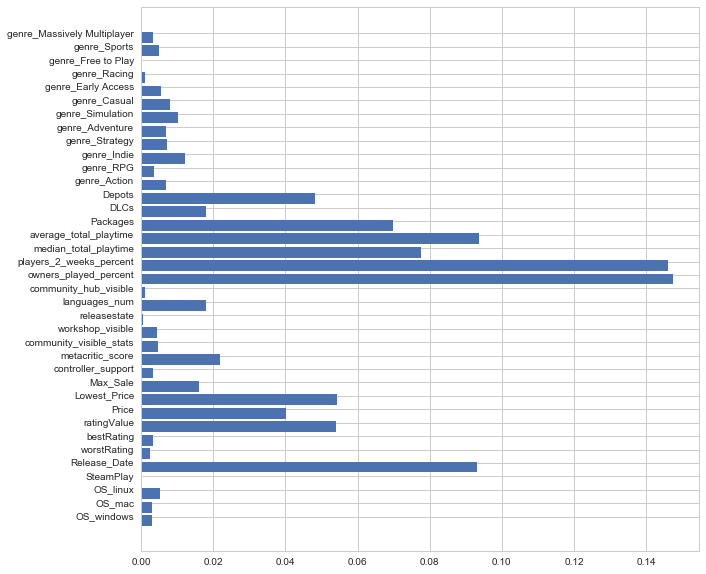

In [160]:
# Plot the "feature importances" given by the gb model - not super useful

fig, ax = plt.subplots(figsize=(10,10))

ind = np.array(range(len(X.columns)))+.7
plt.barh(ind,gbmodel1.feature_importances_);
ax.set_yticks(ind + .3);
ax.set_yticklabels((X_test.columns));

In [161]:
import ml_insights as mli

In [162]:
mxr = mli.ModelXRay(gbmodel1,X_test)

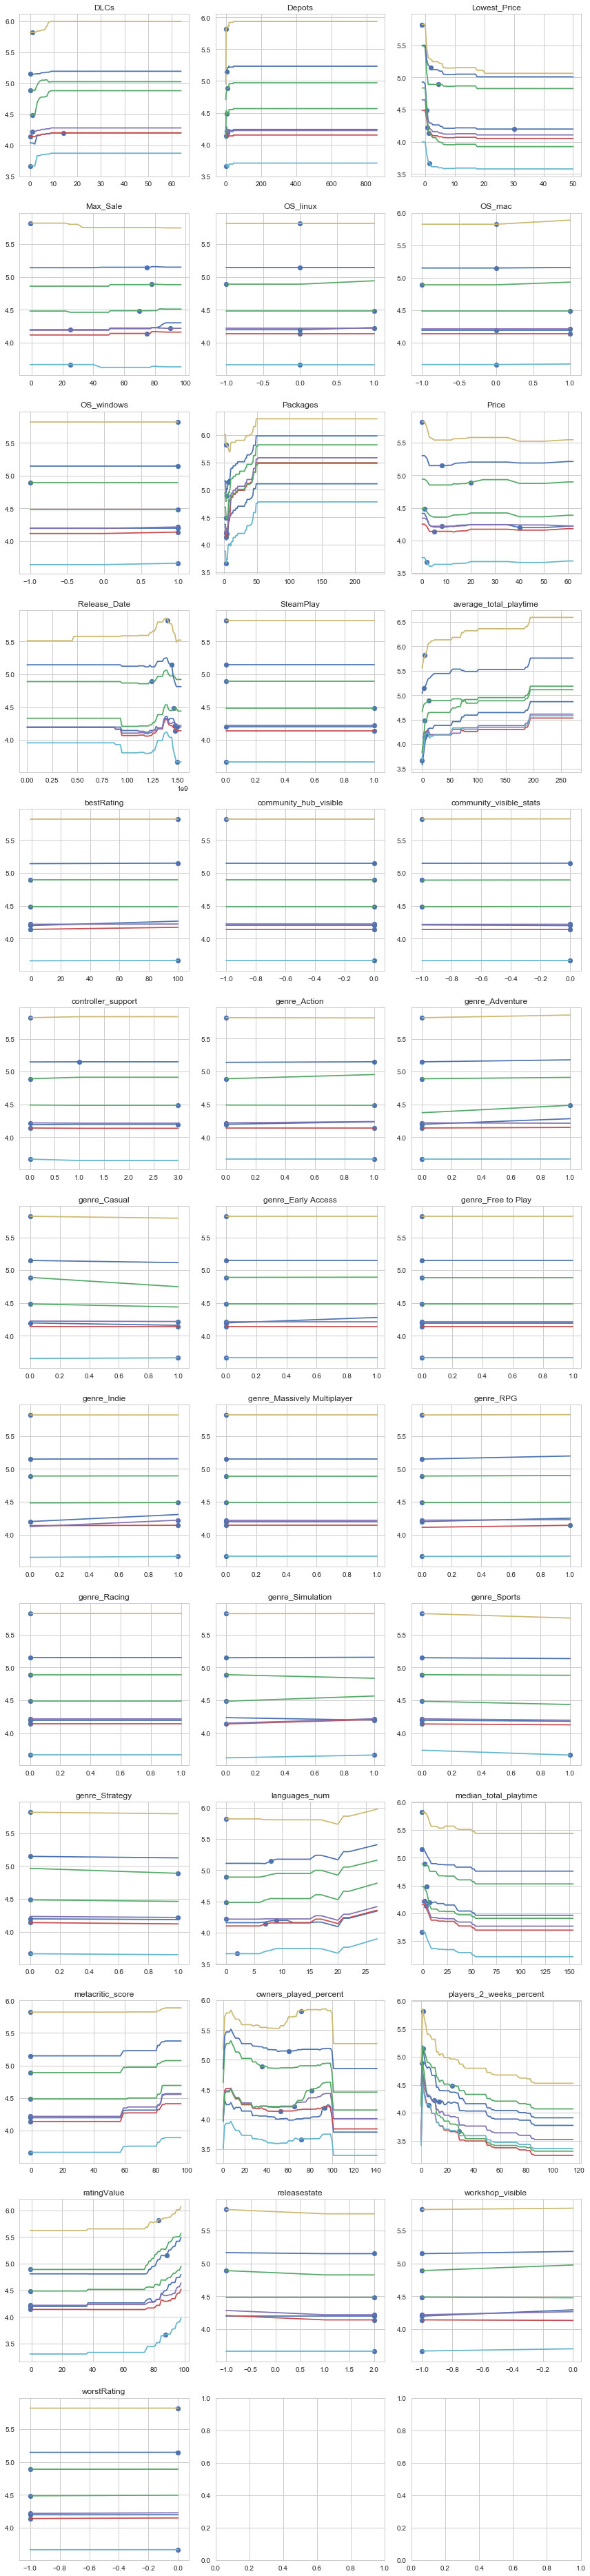

In [163]:
indices = mxr.feature_dependence_plots(num_pts=8)

# Trying out the LASSO

## ... but first a regular Linear Regression Algorithm

In [277]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [278]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,feature_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [279]:
list(zip(feature_columns,lr_model2.coef_))

[('OS_windows', -0.012698044176999223),
 ('OS_mac', 0.039493521086296599),
 ('OS_linux', 0.046364034931348712),
 ('SteamPlay', -0.026192232491171603),
 ('Release_Date', 3.4895163841808241e-10),
 ('worstRating', -0.00016508806817537233),
 ('bestRating', -0.01667389529442035),
 ('ratingValue', 0.025439325447572058),
 ('Price', -0.0020619944231301509),
 ('Lowest_Price', 0.0072084723621583489),
 ('Max_Sale', 0.010162170736479367),
 ('controller_support', 0.014389363893413122),
 ('metacritic_score', 0.0042523484008560181),
 ('community_visible_stats', 0.010046955403550814),
 ('workshop_visible', 0.23715833294383881),
 ('releasestate', -0.11596340066494337),
 ('languages_num', 0.022259757227235),
 ('community_hub_visible', -1.0940112726618469),
 ('owners_played_percent', -0.0011477604524102528),
 ('players_2_weeks_percent', -0.0082887149973017854),
 ('median_total_playtime', -0.011353650352815329),
 ('average_total_playtime', 0.010420106681157511),
 ('Packages', 0.013776381314645529),
 ('DLC

In [280]:
GD_test_set_prediction = lr_model2.predict(X_test.loc[:,feature_columns])
np.sqrt(np.mean((GD_test_set_prediction - y_test)**2))

0.66484365627770314

In [281]:
#R^2 score
r2_score(y_test, GD_test_set_prediction)

0.56987222636386548

In [282]:
#New Multiplicative Metric
MultiAbsError(y_test,GD_test_set_prediction)

3.3172343095823105

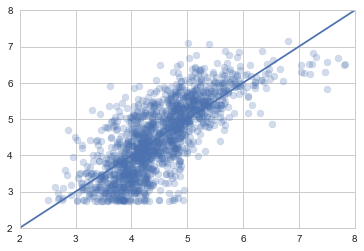

In [283]:
plt.scatter(GD_test_set_prediction,y_test,alpha=.25)

plt.xlim(2,8)
plt.ylim(2,8)

plt.plot(np.linspace(2,8,1000),np.linspace(2,8,1000))

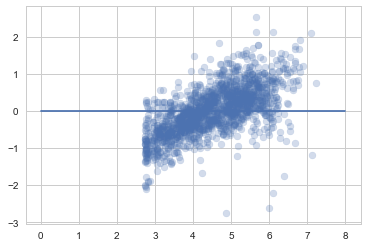

In [194]:
plt.scatter(y_test,y_test-GD_test_set_prediction,alpha=.25)
#plt.yscale('log')

plt.plot(np.linspace(000,8,1000),np.linspace(0,0,1000))

In [284]:
#LASSO!!
LinearRegression_2 = Lasso(alpha = 1)
LinearRegression_2.fit(X_train.loc[:,feature_columns],y_train)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [285]:
list(zip(feature_columns,LinearRegression_2.coef_))


[('OS_windows', -0.0),
 ('OS_mac', 0.0),
 ('OS_linux', -0.0),
 ('SteamPlay', 0.0),
 ('Release_Date', -2.5503268555693871e-10),
 ('worstRating', 0.0),
 ('bestRating', 0.0),
 ('ratingValue', 0.0058444290967407811),
 ('Price', -0.0),
 ('Lowest_Price', -0.0),
 ('Max_Sale', 0.0),
 ('controller_support', -0.0),
 ('metacritic_score', 0.0061581557649924724),
 ('community_visible_stats', -0.0),
 ('workshop_visible', 0.0),
 ('releasestate', -0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', -0.0),
 ('owners_played_percent', -0.0014303792896391851),
 ('players_2_weeks_percent', -0.010906916924025008),
 ('median_total_playtime', -0.0),
 ('average_total_playtime', 0.0073735507439542372),
 ('Packages', 0.014364003259289784),
 ('DLCs', 0.0),
 ('Depots', 0.0),
 ('genre_Action', -0.0),
 ('genre_RPG', -0.0),
 ('genre_Indie', -0.0),
 ('genre_Strategy', -0.0),
 ('genre_Adventure', -0.0),
 ('genre_Simulation', -0.0),
 ('genre_Casual', -0.0),
 ('genre_Early Access', -0.0),
 ('genre_Racing', -0.0),
 

In [286]:
LinearRegression_2_pred = LinearRegression_2.predict(X_test.loc[:,feature_columns])

0.415991427838
3.3172343095823105


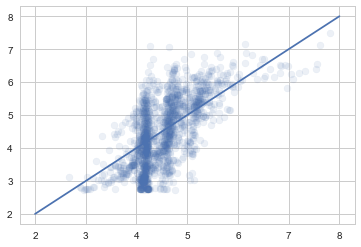

In [287]:
print(r2_score(y_test, LinearRegression_2_pred))
print(MultiAbsError(y_test,GD_test_set_prediction))

plt.scatter(LinearRegression_2_pred,y_test,alpha=.1)

plt.plot(np.linspace(2,8,1000),np.linspace(2,8,1000))

## trying out Andrew's Cross-Validation

## re-running Boosted Trees using only the more effective features:

In [304]:
#only features with importances above 0.04
"""best_features = ['Release_Date',
       'ratingValue', 'Max_Sale',
       'languages_num',
       'players_total',
       'owners_played_percent', 'players_2_weeks_percent',
       'median_total_playtime', 'average_total_playtime', 'Packages', 'Depots']
"""
best_features = ['Release_Date','ratingValue','metacritic_score']   
#best_features = ['ratingValue','metacritic_score']  

#as choosen by Lasso
#best_features = ['Release_Date','reviewCount','owners','owners_unc','players_total','players_2_weeks']

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

3

0.254441176405
5.008973576254897


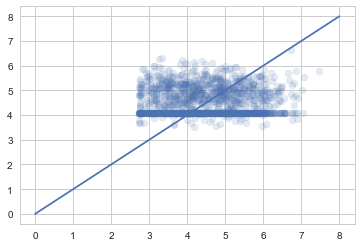

In [305]:
best_features = ['ratingValue','metacritic_score']   

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=.11,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=200,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))
print(MultiAbsError(y_test,gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)

plt.plot(np.linspace(0,8,1000),np.linspace(0,8,1000));

0.443391703133
3.8906151008392906


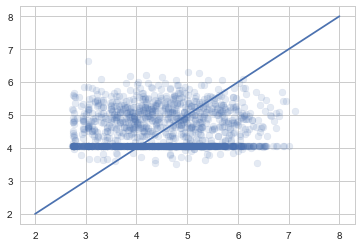

In [306]:
best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.7, learning_rate=.05,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=120,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))
print(MultiAbsError(y_test,gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)

plt.plot(np.linspace(2,8,1000),np.linspace(2,8,1000))

### trying out gridsearch to improve this

In [307]:
from sklearn.model_selection import GridSearchCV

In [308]:
parameters = {'subsample':np.arange(.65,0.95,.05),
              #'max_depth':[4,5,6],
              'learning_rate':np.arange(.001,.010,.001),
              'n_estimators':[180,200,250]}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, parameters, n_jobs=-3, verbose=1)   #note n_jobs = -2 means all but one core
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-3)]: Done  38 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-3)]: Done 188 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-3)]: Done 438 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-3)]: Done 486 out of 486 | elapsed:   20.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-3,
       param_grid={'subsample': array([ 0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ]), 'learning_rate': array([ 0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,  0.008,
        0.009]), 'n_estimators': [180, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [309]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0090000000000000011, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=0.65000000000000002, verbose=0, warm_start=False)

0.433547725905
3.983281632037144


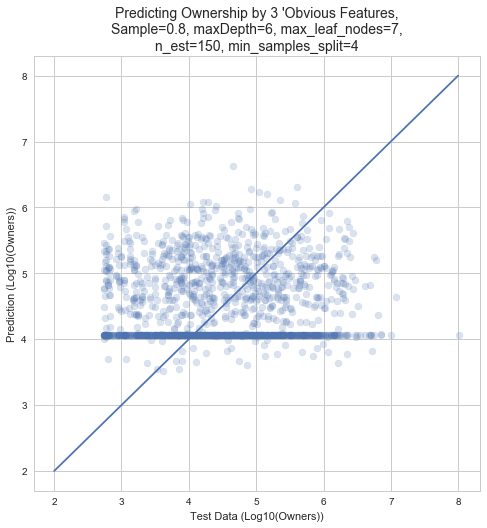

In [314]:
best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.65, learning_rate=.009,\
                max_depth = 3,max_leaf_nodes=7,n_estimators=250,\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))
print(MultiAbsError(y_test,gb1_test_pred))

plt.figure(figsize=(8,8))
plt.scatter(y_test, rf1_test_pred,alpha=.2)

plt.xlabel("Test Data (Log10(Owners))")
plt.ylabel("Prediction (Log10(Owners))")
plt.title("Predicting Ownership by 3 'Obvious Features,\nSample=0.8, maxDepth=6, max_leaf_nodes=7,\nn_est=150, min_samples_split=4",fontsize=14)

plt.plot(np.linspace(2,8,1000),np.linspace(2,8,1000));

In [311]:
best_features = ['ratingValue','metacritic_score']   #- ratings only!

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

parameters = {'subsample':np.arange(.65,0.95,.05),
              #'max_depth':[4,5,6],
              'learning_rate':np.arange(.001,.010,.001),
              'n_estimators':[180,200,250]}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, parameters, n_jobs=-2, verbose=1)   #note n_jobs = -2 means all but one core
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-2)]: Done 486 out of 486 | elapsed:   16.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'subsample': array([ 0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ]), 'learning_rate': array([ 0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,  0.008,
        0.009]), 'n_estimators': [180, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [296]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0090000000000000011, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=0.80000000000000016, verbose=0, warm_start=False)

0.277385937165
4.889244421830712


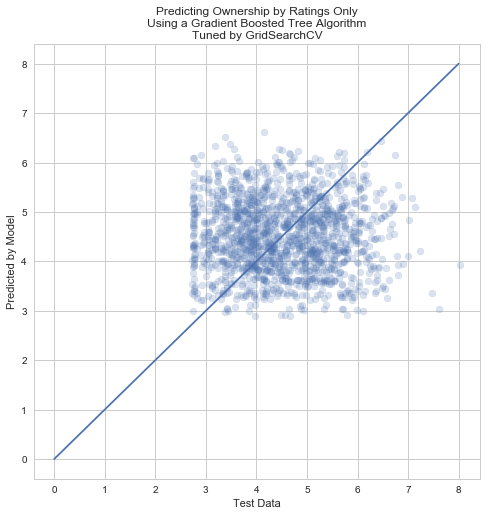

In [321]:
best_features = ['ratingValue','metacritic_score']   

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

gbmodel1 = GradientBoostingRegressor(subsample=0.7, learning_rate=.009,\
                max_depth = 3,max_leaf_nodes=7,n_estimators=250,\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))
print(MultiAbsError(y_test,gb1_test_pred))

plt.figure(figsize=(8,8))
plt.scatter(y_test, rf1_test_pred,alpha=.2)

plt.xlabel("Test Data")
plt.ylabel("Predicted by Model")
plt.title("Predicting Ownership by Ratings Only\nUsing a Gradient Boosted Tree Algorithm\nTuned by GridSearchCV")
plt.plot(np.linspace(0,8,1000),np.linspace(0,8,1000));

## Random forrest on just a few obvious variables:

0.391903754803
4.317022909860583


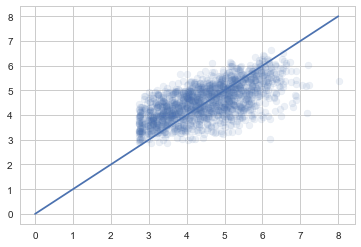

In [316]:

best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

rfmodel1 = RandomForestRegressor(n_estimators = 300, min_samples_leaf=3,\
           max_features=3, n_jobs=-2, bootstrap=True)
rfmodel1.fit(X_train,y_train)
rf1_test_pred = rfmodel1.predict(X_test)

print(r2_score(y_test, rf1_test_pred))
print(MultiAbsError(y_test,rf1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.1)

plt.plot(np.linspace(0,8,1000),np.linspace(0,8,1000));

0.23487094755
5.122120782135366


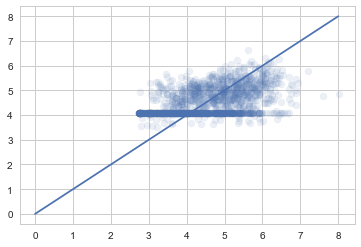

In [299]:

best_features = ['ratingValue','metacritic_score']   

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)

rfmodel1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf=3,\
           max_features=2, n_jobs=-2, bootstrap=True)
rfmodel1.fit(X_train,y_train)
rf1_test_pred = rfmodel1.predict(X_test)

print(r2_score(y_test, rf1_test_pred))
print(MultiAbsError(y_test,rf1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.1)

plt.plot(np.linspace(0,8,1000),np.linspace(0,8,1000));

## Gradient Descent on 'obvious' columns

[ -4.68141852e-10   6.39293697e-03   1.02867513e-02]
0.268808519254
4.944303374968172


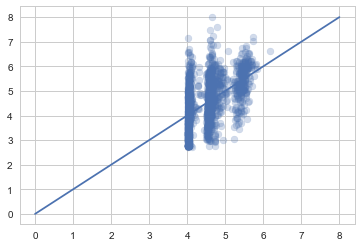

In [317]:

best_features = ['Release_Date','ratingValue','metacritic_score']   

y = df.loc[:,"owners_log"]
X = df.loc[:,best_features]
#Split the data 70-30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X.columns)


lr_model3 = LinearRegression()
lr_model3.fit(X_train.loc[:,best_features],y_train)

GD_test_set_prediction = lr_model3.predict(X_test.loc[:,best_features])
print(lr_model3.coef_)

#R^2 score
print(r2_score(y_test, GD_test_set_prediction))
print(MultiAbsError(y_test,GD_test_set_prediction))

plt.scatter(GD_test_set_prediction,y_test,alpha=.25)

plt.plot(np.linspace(0,8,1000),np.linspace(0,8,1000));

In [6]:
np.geomspace(1,10,10)

array([  1.        ,   1.29154967,   1.66810054,   2.15443469,
         2.7825594 ,   3.59381366,   4.64158883,   5.9948425 ,
         7.74263683,  10.        ])